In [3]:
# -------------------------------------------------------
# CREDITPATHAI PROJECT
# DATABASE CREATION + TABLE STORAGE + FULL EDA
# -------------------------------------------------------

# ===============================
# STEP 1: Upload CSV Files
# ===============================
from google.colab import files
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

print("Upload FIRST file (Raw Dataset)")
uploaded1 = files.upload()

print("Upload SECOND file (Preprocessed Dataset)")
uploaded2 = files.upload()

file1 = list(uploaded1.keys())[0]
file2 = list(uploaded2.keys())[0]

# Load CSV files
df_raw = pd.read_csv(file1)
df_processed = pd.read_csv(file2)

print("Files loaded successfully ✅")


# ===============================
# STEP 2: Create SQLite Database
# ===============================
conn = sqlite3.connect("creditpathai.db")

# Store tables in database
df_raw.to_sql("raw_loans", conn, if_exists="replace", index=False)
df_processed.to_sql("processed_loans", conn, if_exists="replace", index=False)

print("Tables created in database ✅")

# Verify tables
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tables in Database:", cursor.fetchall())


# ===============================
# STEP 3: Load Table for EDA
# ===============================
df = pd.read_sql("SELECT * FROM processed_loans", conn)
print("Processed table loaded for EDA ✅")


# ===============================
# STEP 4: Basic Overview
# ===============================
print("\nDataset Shape:", df.shape)

print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())








Upload FIRST file (Raw Dataset)


Saving Loan_DefaultProject.csv to Loan_DefaultProject (1).csv
Upload SECOND file (Preprocessed Dataset)


Saving Loan_DefaultProject_preprocessed.csv to Loan_DefaultProject_preprocessed (1).csv
Files loaded successfully ✅
Tables created in database ✅
Tables in Database: [('raw_loans',), ('processed_loans',)]
Processed table loaded for EDA ✅

Dataset Shape: (148670, 34)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  float64
 1   year                       148670 non-null  float64
 2   loan_limit                 148670 non-null  int64  
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  int64  
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  int64  
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670

In [4]:
for col in df.columns:
    print(f"'{col}'")


'ID'
'year'
'loan_limit'
'Gender'
'approv_in_adv'
'loan_type'
'loan_purpose'
'Credit_Worthiness'
'open_credit'
'business_or_commercial'
'loan_amount'
'rate_of_interest'
'Interest_rate_spread'
'Upfront_charges'
'term'
'Neg_ammortization'
'interest_only'
'lump_sum_payment'
'property_value'
'construction_type'
'occupancy_type'
'Secured_by'
'total_units'
'income'
'credit_type'
'Credit_Score'
'co-applicant_credit_type'
'age'
'submission_of_application'
'LTV'
'Region'
'Security_Type'
'Status'
'dtir1'


Status Value Counts:

Status
-0.571877    112031
 1.748627     36639
Name: count, dtype: int64


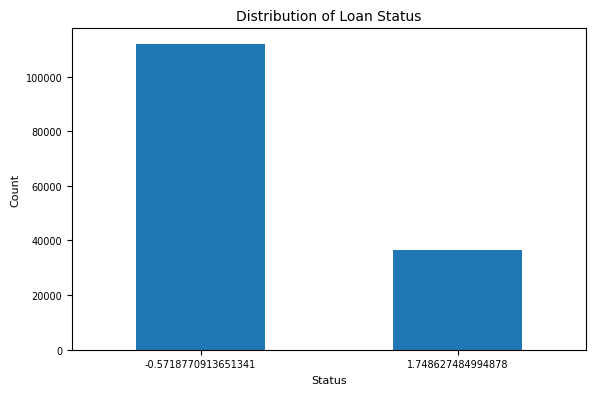


Numerical Columns:
 Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


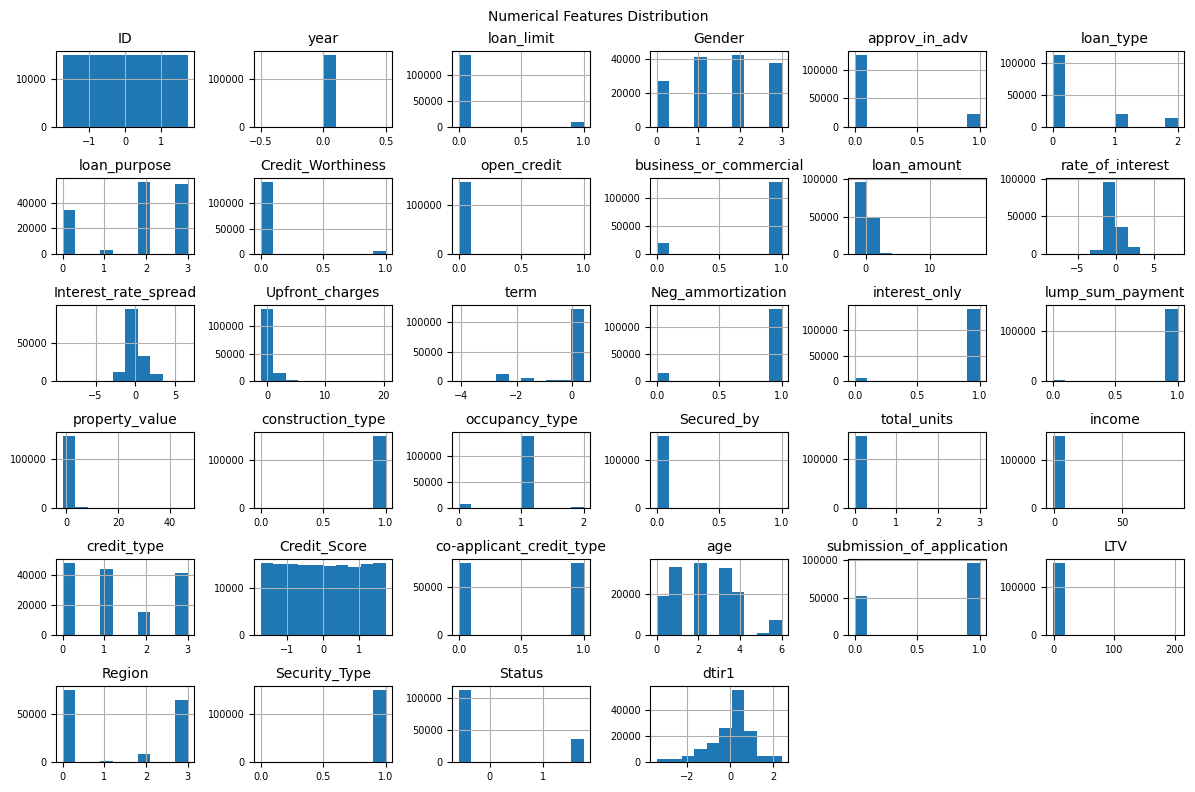


Categorical Columns:
 Index([], dtype='object')


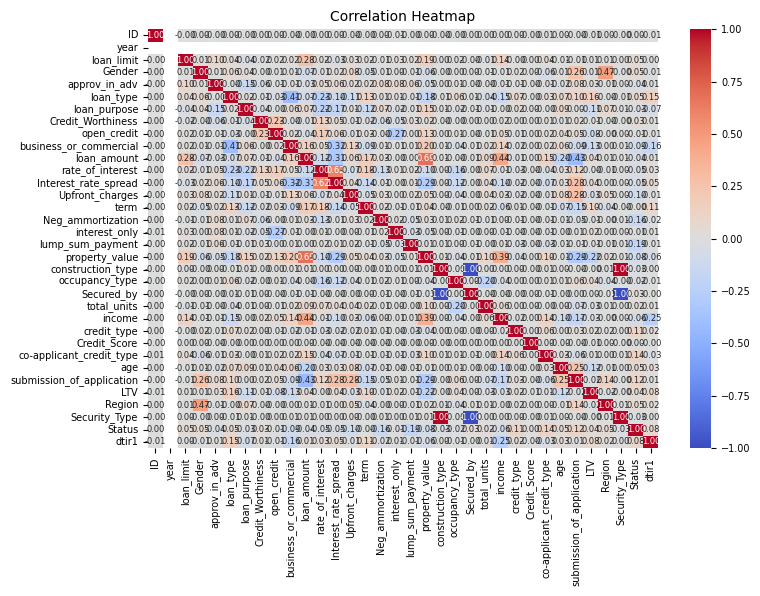

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Global Style Fix (IMPORTANT)
# -------------------------------
plt.rcParams.update({
    'font.size': 8,
    'axes.titlesize': 10,
    'axes.labelsize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7
})


# -------------------------------
# Step 5.1: Target Variable
# -------------------------------
print("Status Value Counts:\n")
print(df['Status'].value_counts())

plt.figure(figsize=(6,4))
df['Status'].value_counts().plot(kind='bar')
plt.title("Distribution of Loan Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# -------------------------------
# Step 5.2: Numerical Features
# -------------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nNumerical Columns:\n", num_cols)

df[num_cols].hist(figsize=(12,8))
plt.suptitle("Numerical Features Distribution", fontsize=10)
plt.tight_layout()
plt.show()


# -------------------------------
# Step 5.3: Categorical Features
# -------------------------------
cat_cols = df.select_dtypes(include=['object']).columns

print("\nCategorical Columns:\n", cat_cols)

for col in cat_cols[:5]:   # limit to avoid clutter
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# -------------------------------
# Step 5.4: Target vs Categorical
# -------------------------------
for col in cat_cols[:5]:
    plt.figure(figsize=(6,4))
    df.groupby(col)['Status'].value_counts().unstack().plot(kind='bar', stacked=True)
    plt.title(f"{col} vs Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# -------------------------------
# Step 5.5: Correlation Heatmap
# -------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f",
            cmap="coolwarm", annot_kws={"size":6})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


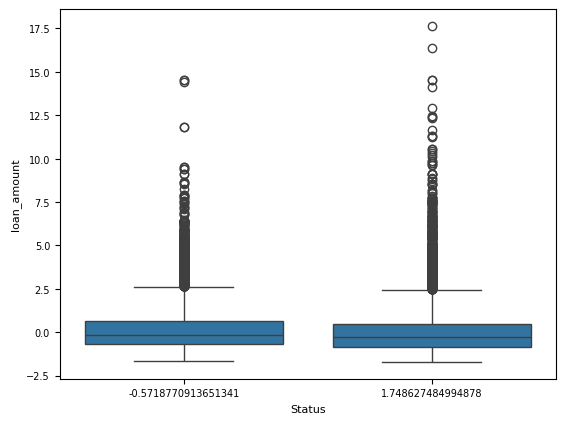

In [10]:
sns.boxplot(x='Status', y='loan_amount', data=df)
plt.show()


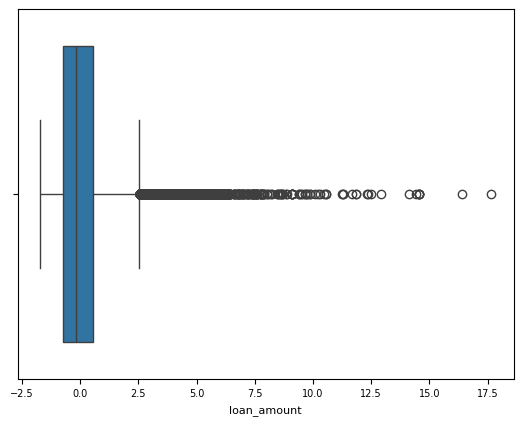

In [11]:
sns.boxplot(x=df['loan_amount'])
plt.show()
